In [8]:
#Импортирую необходимые для работы библиотеки
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
#Считываю данные
data = pd.read_csv("wine.csv")

In [12]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [6]:
#Кроме целевого признака, всего 11 признаков. Объектов 1599 штук. Пропущенных значений нет.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [7]:
#Данные не нужно скейлить
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


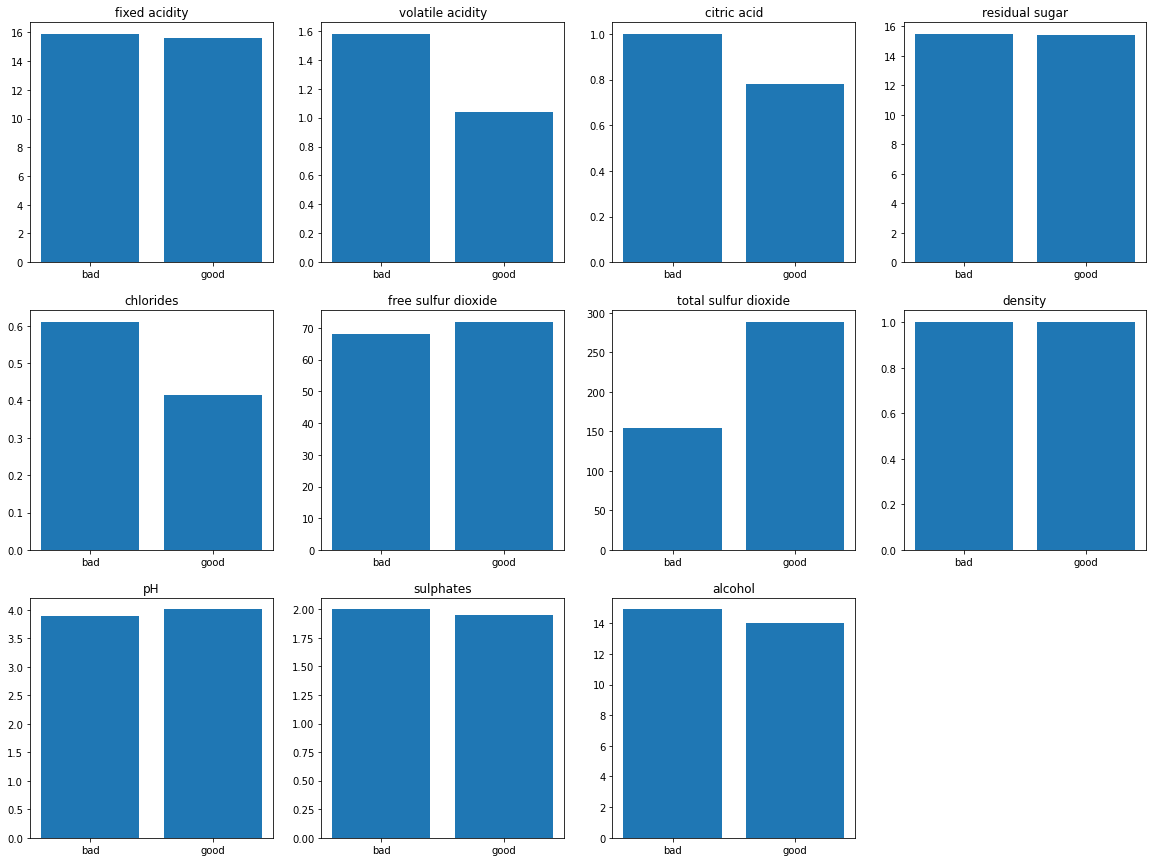

In [8]:
#По этим графикам, можно найти признаки, по которым неясно, какое вино хорошее, а какое плохое. Они не информативны
plt.figure(figsize=(20,15))
for i, j in enumerate(data.columns[:-1]):
    plt.subplot (3, 4, i+1)
    plt.title(j)
    plt.bar(data['quality'], data[j])

In [9]:
#Заменяю целевую переменную
data['quality'] = np.where((data['quality'] == 'good'), 1, 0)

In [10]:
#Удаляю лишние признаки
data = data.drop(['fixed acidity', 'residual sugar', 'density', 'sulphates', 'pH'], axis=1)

In [11]:
data.head()

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,alcohol,quality
0,0.70,0.00,0.076,11.0,34.0,9.4,0
1,0.88,0.00,0.098,25.0,67.0,9.8,0
2,0.76,0.04,0.092,15.0,54.0,9.8,0
3,0.28,0.56,0.075,17.0,60.0,9.8,1
4,0.70,0.00,0.076,11.0,34.0,9.4,0


In [12]:
#Выборка достаточно сбалансированная
data['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

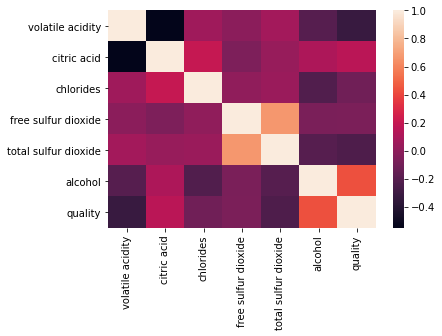

In [50]:
#Признаки не сильно закореллированы
import seaborn as sb
dataplot=sb.heatmap(data.corr())

In [13]:
X = data.iloc[:, 0:-1]
y = data.iloc[:,-1]

In [14]:
#Разделяю выборку на тестовую и тренировочную
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
#Проверка моделей

In [16]:
np.random.seed(42)
print('RandomForestClassifier:\naccuracy:', str(cross_val_score(RandomForestClassifier(), X, y, cv=10).mean()))
print('SVM:\naccuracy:', str(cross_val_score(SVC(), X, y, cv=10).mean()))
print('LogisticRegression:\naccuracy:', str(cross_val_score(LogisticRegression(max_iter=1000), X, y, cv=10).mean()))

RandomForestClassifier:
accuracy: 0.7035613207547169
SVM:
accuracy: 0.6341037735849056
LogisticRegression:
accuracy: 0.7385888364779875


In [51]:
#Выбираю классификатор случайного леса и провожу подбор параметров по сетке
model = RandomForestClassifier()
params = {
    'n_estimators':range(80,180, 10),
    'max_depth':[3,7,10],
}
gs = GridSearchCV(model, params)

In [52]:
gs.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 7, 10],
                         'n_estimators': range(80, 180, 10)})

In [53]:
#Найдены оптимальные параметры, на них модель выдает качество 0.8
best_model = gs.best_estimator_
predicted_by_grid = best_model.predict(X_test)
print(accuracy_score(predicted_by_grid, y_test))
print(gs.best_params_)

0.8
{'max_depth': 10, 'n_estimators': 130}


In [54]:
#У моей модели можно посмотреть самые важные признаки
importances = dict(zip(X.columns, best_model.feature_importances_))
sorted_keys = sorted(importances, key=importances.get)
ans = {}
for w in sorted_keys:
    ans[w] = importances[w]
print(ans)

{'free sulfur dioxide': 0.10441949060418279, 'citric acid': 0.11407500883224819, 'chlorides': 0.12813263546545375, 'total sulfur dioxide': 0.1694231076317862, 'volatile acidity': 0.19159703995978725, 'alcohol': 0.2923527175065419}


In [55]:
print(accuracy_score(best_model.predict(X_test), y_test))

0.8


In [56]:
#Матрица ошибок
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, best_model.predict(X_test))

array([[111,  30],
       [ 34, 145]], dtype=int64)

In [57]:
#Завершающий штрих - метрики качества
from sklearn.metrics import classification_report
print(classification_report(y_test, best_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       141
           1       0.83      0.81      0.82       179

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.80      0.80      0.80       320

